In [2]:
import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
import sys

sys.path.append('..')
from utils import load_database_table
from prepare_data import *

TODAY = dt.datetime.today().strftime('%Y-%m-%d %H:%M:%S')
TODAY = '2024-01-30 00:00:00'
start_date = (dt.datetime.strptime(TODAY, '%Y-%m-%d %H:%M:%S') - dt.timedelta(days=60)).strftime('%Y-%m-%d %H:%M:%S')

#SQL command to join budgets to adsets hourlies
req_1 = "SELECT * FROM adsets_hourlies AS a LEFT JOIN budget_changes AS b ON a.campaign_name = b.campaign_name and a.adset_datetime = b.datetime WHERE adset_datetime BETWEEN '"+start_date+"' AND '"+TODAY+"'"
#SQL command to fetch conversions data
req_2 = "SELECT hour, campaign_name, conversions FROM facebook_conversions AS fbc LEFT JOIN campaigns_dailies AS cd ON fbc.campaign_id = cd.campaign_id WHERE hour BETWEEN '"+start_date+"' AND '"+TODAY+"'"

df = load_database_table(None, req_1)
cdf = load_database_table(None, req_2)

Executing custom command: SELECT * FROM adsets_hourlies AS a LEFT JOIN budget_changes AS b ON a.campaign_name = b.campaign_name and a.adset_datetime = b.datetime WHERE adset_datetime BETWEEN '2023-12-01 00:00:00' AND '2024-01-30 00:00:00'
Executing custom command: SELECT hour, campaign_name, conversions FROM facebook_conversions AS fbc LEFT JOIN campaigns_dailies AS cd ON fbc.campaign_id = cd.campaign_id WHERE hour BETWEEN '2023-12-01 00:00:00' AND '2024-01-30 00:00:00'


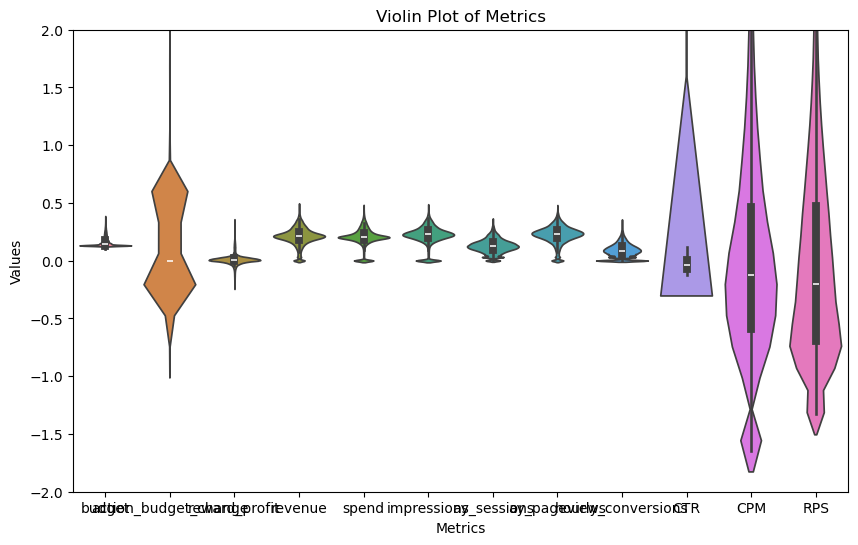

array([[[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00, -7.74324843e-02, -2.87941887e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00, -6.08400169e-02, -2.10509403e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00,  2.45429411e-03, -1.49669386e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00, -6.02059991e-02, -5.01640430e-01],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00, -1.18099312e

In [3]:
cols=pd.Series(df.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
df.columns=cols

#Drop na values from campaign_name
df.dropna(subset=['campaign_name'], inplace=True)
df = df[~df['campaign_name'].str.contains('-A1|test', regex=True)]

#Apply an optional filter to campaigns
specific_campaign = 'RockHoFNope03B-A7-EK-US-AND-RPS5-GS-1-gallery-U743-1706021099'
filtered_df = df[df['campaign_name'].str.contains(specific_campaign)]

seq, mask = create_trajectories_file(df, cdf, savepath_id='dec-jan', sequence_length=48)

seq